In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
raw_train_data = pd.read_csv("D:\\train.csv")
raw_test_data = pd.read_csv("D:\\test.csv")

In [4]:
print(raw_train_data.shape)
print(raw_test_data.shape)

(61878, 95)
(144368, 94)


In [5]:
Train_data = raw_train_data.iloc[:, 1:95]
labels = set(Train_data.iloc[:,93:94].target)
Valid_x = np.array(raw_test_data.iloc[:, 1:94])
Total_x = np.array(Train_data.iloc[:,0:93])
Total_y = np.array(Train_data.iloc[:,93:94])

In [6]:
print(f"The current has the following label {labels}")
print(f"The shape the Total_X {Total_x.shape}")
print(f"The shape the Total_Y {Total_y.shape}")
print(f"The shape the Valid_X {Valid_x.shape}")
print(f"Check Nan in Total_X {set(np.isnan(Total_x).any(axis=1))}")
# print(f"Check Nan in Train_Y {np.isnan(Train_Y).any(axis=1)}")
print(f"Check Nan in Valid_X {set(np.isnan(Valid_x).any(axis=1))}")

The current has the following label {'Class_5', 'Class_9', 'Class_7', 'Class_3', 'Class_8', 'Class_2', 'Class_6', 'Class_1', 'Class_4'}
The shape the Total_X (61878, 93)
The shape the Total_Y (61878, 1)
The shape the Valid_X (144368, 93)
Check Nan in Total_X {False}
Check Nan in Valid_X {False}


In [7]:
np.random.seed(10)
Total_X,Total_Y = shuffle(Total_x,Total_y)

In [8]:
# In this part using the previous 50000 to do the training and the last data to do the test check the score
Train_X = Total_X[:50000]
Train_Y = Total_Y[:50000]
Test_X = Total_X[50000:]
Test_Y = Total_Y[50000:]
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(50000, 93)
(50000, 1)
(11878, 93)
(11878, 1)


In [9]:
checking_dict = dict()
for n in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    # fit the knn classifier
    knn_classifier.fit(Train_X ,Train_Y.ravel())
    predict_y_n = knn_classifier.predict(Test_X)
    predict_y_proba_n = knn_classifier.predict_proba(Test_X)
    acc_score = accuracy_score(Test_Y,predict_y_n)
    log_loss_n = log_loss(Test_Y, predict_y_proba_n)
    print(f"Current n_neighbour is {n}, the log_loss is {log_loss_n}, the accuracy score is {acc_score}")
    checking_dict.update({n:acc_score})

Current n_neighbour is 1, the log_loss is 7.926646274838072, the accuracy score is 0.7705000841892574
Current n_neighbour is 2, the log_loss is 5.046026884676152, the accuracy score is 0.7614918336420273
Current n_neighbour is 3, the log_loss is 3.6978808596525865, the accuracy score is 0.7730257619127799
Current n_neighbour is 4, the log_loss is 2.90144473305014, the accuracy score is 0.7758881966661054
Current n_neighbour is 5, the log_loss is 2.4159504282920548, the accuracy score is 0.7762249536959084
Current n_neighbour is 6, the log_loss is 2.0834346225263842, the accuracy score is 0.7778245495874726
Current n_neighbour is 7, the log_loss is 1.8202891488831725, the accuracy score is 0.7792557669641353
Current n_neighbour is 8, the log_loss is 1.6448991520863252, the accuracy score is 0.7774036033002188
Current n_neighbour is 9, the log_loss is 1.5141681349962075, the accuracy score is 0.7779087388449234
Current n_neighbour is 10, the log_loss is 1.421240574450576, the accuracy sc

In [10]:
sorted_dict = sorted(checking_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
# print(sorted_dict[0])
best_n_neighbour = sorted_dict[0][0]
best_accuracy = sorted_dict[0][1]
print(f"The current best acc is {best_accuracy}, and the best n neighbours is {best_n_neighbour}")

The current best acc is 0.7792557669641353, and the best n neighbours is 7


In [11]:
# The n_neighbors=3 is due to KNeighboursClassifier [k=3]
knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbour)
# fit the knn classifier
knn_classifier.fit(Train_X ,Train_Y.ravel())

KNeighborsClassifier(n_neighbors=7)

In [12]:
predict_y = knn_classifier.predict(Test_X)
predict_y_train =knn_classifier.predict(Train_X)
predict_y_proba = knn_classifier.predict_proba(Test_X)

In [13]:
print(predict_y)

['Class_3' 'Class_6' 'Class_5' ... 'Class_5' 'Class_6' 'Class_2']


In [14]:
normal_KNN_report = metrics.classification_report(Test_Y,predict_y)
Train_acc = accuracy_score(Train_Y,predict_y_train)
log_loss_result = log_loss(Test_Y, predict_y_proba)

In [25]:
print("The report of KNN")
print(normal_KNN_report)
print(f"The log loss of KNN is {log_loss_result}")
print(f"The Training accuracy of KNN is {Train_acc}")

The report of KNN
              precision    recall  f1-score   support

     Class_1       0.58      0.52      0.55       346
     Class_2       0.69      0.83      0.75      3070
     Class_3       0.51      0.46      0.48      1484
     Class_4       0.61      0.24      0.34       495
     Class_5       0.93      0.98      0.95       586
     Class_6       0.95      0.93      0.94      2730
     Class_7       0.75      0.55      0.63       554
     Class_8       0.91      0.90      0.90      1650
     Class_9       0.85      0.87      0.86       963

    accuracy                           0.78     11878
   macro avg       0.75      0.70      0.71     11878
weighted avg       0.78      0.78      0.77     11878

The log loss of KNN is 1.8202891488831725


In [16]:
ground_truth_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
knn_result_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}

In [17]:
for item in Test_Y:
    ground_truth_dict[item[-1]] += 1
print(ground_truth_dict)
    
for item in predict_y:
    knn_result_dict[item] += 1
print(knn_result_dict)

{'Class_1': 346, 'Class_2': 3070, 'Class_3': 1484, 'Class_4': 495, 'Class_5': 586, 'Class_6': 2730, 'Class_7': 554, 'Class_8': 1650, 'Class_9': 963}
{'Class_1': 308, 'Class_2': 3708, 'Class_3': 1352, 'Class_4': 196, 'Class_5': 616, 'Class_6': 2676, 'Class_7': 407, 'Class_8': 1630, 'Class_9': 985}


In [18]:
import matplotlib.pyplot as plt

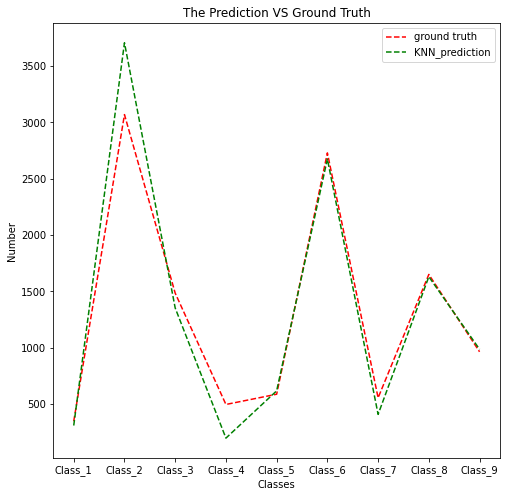

In [22]:
plt.figure(figsize=(8, 8))
l1=plt.plot(ground_truth_dict.keys(),ground_truth_dict.values(),'r--',label='ground truth')
l2=plt.plot(knn_result_dict.keys(),knn_result_dict.values(),'g--',label='KNN_prediction')
plt.title('The Prediction VS Ground Truth')
plt.xlabel('Classes')
plt.ylabel('Number')
plt.legend()
plt.savefig("./KNN_comparison.jpg")
plt.show()

No handles with labels found to put in legend.


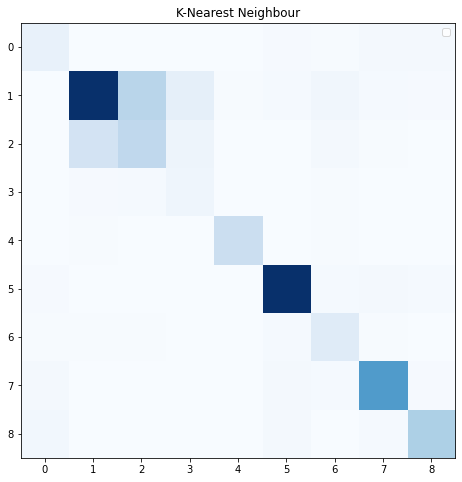

In [24]:
from sklearn.metrics import confusion_matrix
confusion_KNN = confusion_matrix(predict_y, Test_Y)
plt.figure(figsize=(8, 8))
plt.title('K-Nearest Neighbour')
plt.legend()
plt.imshow(confusion_KNN, cmap=plt.cm.Blues)
plt.savefig("./KNN_confusion_matrix.jpg")